In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from dataclasses import dataclass
from symmetry import Symmetry


In [3]:
# how many rows to print
pd.set_option('display.max_rows', 10)

# comparing Pilatus and Eiger Ni 25 µm frames against each other

The data has pre-processed by Lennard Krause into HKL files.

Please follow this rabbit hole:  SADABS 2016/2: Krause, L., Herbst-Irmer, R., Sheldrick G.M. & Stalke D.,
 J. Appl. Cryst. 48 (2015) 3-10

In [4]:
from dataset import dataset

In [5]:
fesb_symm = 'mmm'
eiger_ni25 = dataset('0347.hkl', symmetry=fesb_symm)
pilatus_ni25 = dataset('0376.hkl', symmetry=fesb_symm)

New dataset: 0347.hkl
Setting symmetry to mmm for 0347.hkl
No. of symops: 8
Length of data loaded: 831
Length of reduced data: 229
New dataset: 0376.hkl
Setting symmetry to mmm for 0376.hkl
No. of symops: 8
Length of data loaded: 664
Length of reduced data: 189


In [6]:
print(eiger_ni25.data)

             intensity     sigma
hkl                             
(0, 0, 1)     0.213957  0.022628
(0, 0, 2)  9440.165000  1.606515
(0, 1, 0)     9.341240  0.016160
(0, 1, 1)  2205.452500  0.546288
(0, 1, 2)     1.938720  0.029650
...                ...       ...
(7, 6, 0)  2791.890000  1.987045
(8, 3, 0)     3.090760  0.031510
(8, 3, 1)  1214.240000  0.871940
(8, 4, 0)  4186.920000  2.820750
(8, 4, 1)     6.201405  0.044045

[229 rows x 2 columns]


In [7]:
#eiger_ni25.data
pass

In [8]:
# merge the datasets based on the hkl-tuples
data = eiger_ni25.data.merge(pilatus_ni25.data, how='inner', on=['hkl'], suffixes=('_eig','_pil'), indicator=True)

In [9]:
print(data)

           intensity_eig  sigma_eig  intensity_pil  sigma_pil _merge
hkl                                                                 
(0, 0, 2)     9440.16500   1.606515     9578.61500   9.945820   both
(0, 1, 0)        9.34124   0.016160        2.18844   0.058290   both
(0, 1, 1)     2205.45250   0.546288     1911.35000   3.236392   both
(0, 1, 3)     1053.85000   0.556708      481.52000   2.677390   both
(0, 2, 0)       22.76680   0.031050       13.75535   0.178995   both
...                  ...        ...            ...        ...    ...
(7, 4, 1)     1204.10750   0.901883      642.38100   2.679185   both
(7, 4, 2)      462.47200   0.511590      258.12900   1.831025   both
(7, 5, 0)      147.54350   0.191215       71.30265   0.928035   both
(7, 5, 1)     3230.78250   2.355515     1920.74000   4.487950   both
(7, 6, 0)     2791.89000   1.987045     1530.61500   3.588960   both

[175 rows x 5 columns]


In [10]:
# calculate the scalar between them as the sum(intensity1*intensity2)/sum(intensity1)
# and scale intensity1 to intensity2
scale = np.nansum(data['intensity_eig']*data['intensity_pil'])/np.nansum(np.square(data['intensity_eig']))
data['intensity_eig'] *= scale

[Text(0.5, 0, '$I_{EIGER}$'), Text(0, 0.5, '$I_{PILATUS}$')]

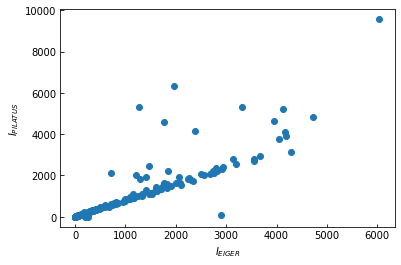

In [13]:
fig, ax = plt.subplots()

ax.scatter(data['intensity_eig'], data['intensity_pil'])
ax.tick_params(direction='in')

ax.set(xlabel='$I_{EIGER}$',
       ylabel='$I_{PILATUS}$',
      )

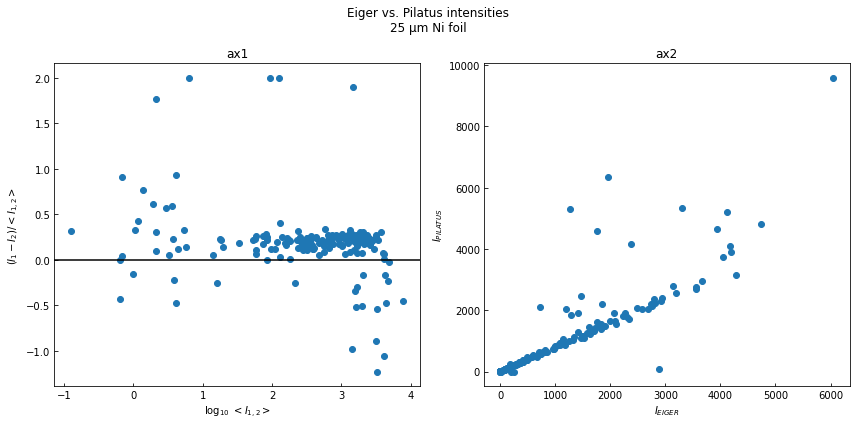

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))

data_mean = (data['intensity_eig'] + data['intensity_pil'])/2
x = np.log10(data_mean)

y = (data['intensity_eig']-data['intensity_pil'])/data_mean
ax1.axhline(y=0, c='k')
ax1.scatter(x, y)

ax1.tick_params(direction='in')

ax1.set(xlabel=r'log$_{10}$ $<I_{1,2}>$',
        ylabel='($I_1 - I_2$)/$<I_{1,2}>$',
        title='ax1'
       
      )


ax2.scatter(data['intensity_eig'], data['intensity_pil'])
ax2.tick_params(direction='in')

ax2.set(xlabel='$I_{EIGER}$',
        ylabel='$I_{PILATUS}$',
        title='ax2'
       )


fig.suptitle('Eiger vs. Pilatus intensities\n25 µm Ni foil')
fig.tight_layout()